### Setup

In [1]:
import sys
import sklearn
import tensorflow as tf
from tensorflow import keras
print('python version:', sys.version_info)
print('sklearn version:', sklearn.__version__)
print('tensorflow version:', tf.__version__)

python version: sys.version_info(major=3, minor=9, micro=7, releaselevel='final', serial=0)
sklearn version: 1.0.1
tensorflow version: 2.7.0


In [2]:
%load_ext tensorboard
%matplotlib inline
import numpy as np
import os
np.random.seed(42)
import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)

In [3]:
PROJECT_ROOT_DIR = 'data'
CHAPTER_ID = 'deep'
IMAGES_PATH = os.path.join(PROJECT_ROOT_DIR, 'images', CHAPTER_ID)
os.makedirs(IMAGES_PATH, exist_ok=True)

def save_fig(fig_id, tight_layout=True, fig_extension='png', resolution=300):
    path = os.path.join(IMAGES_PATH, fig_id + '.' + fig_extension)
    print('Saving figure', fig_id)
    if tight_layout:
        plt.tight_layout()
    plt.savefig(path, format=fig_extension, dpi=resolution)

### Vanishing/Exploding Gradients Problem

In [4]:
def logit(z):
    return 1 / (1 + np.exp(-z))

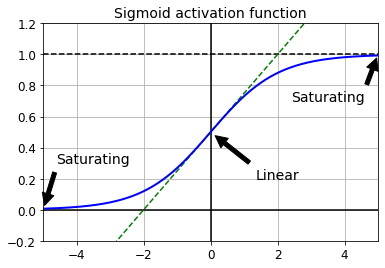

In [5]:
z = np.linspace(-5, 5, 200)
plt.plot([-5, 5], [0, 0], 'k-')
plt.plot([-5, 5], [1, 1], 'k--')
plt.plot([0, 0], [-0.2, 1.2], 'k-')
plt.plot([-5, 5], [-3/4, 7/4], 'g--')
plt.plot(z, logit(z), 'b-', linewidth=2)
props = dict(facecolor='black', shrink=0.1)
plt.annotate('Saturating', xytext=(3.5, 0.7), xy=(5, 1), arrowprops=props, fontsize=14, ha='center')
plt.annotate('Saturating', xytext=(-3.5, 0.3), xy=(-5, 0), arrowprops=props, fontsize=14, ha='center')
plt.annotate('Linear', xytext=(2, 0.2), xy=(0, 0.5), arrowprops=props, fontsize=14, ha='center')
plt.grid(True)
plt.title("Sigmoid activation function", fontsize=14)
plt.axis([-5, 5, -0.2, 1.2])
#save_fig('sigmoid_saturation_plot')
plt.show()

#### Xavier and He Initialization

In [6]:
[name for name in dir(keras.initializers) if not name.startswith('_')]

['Constant',
 'GlorotNormal',
 'GlorotUniform',
 'HeNormal',
 'HeUniform',
 'Identity',
 'Initializer',
 'LecunNormal',
 'LecunUniform',
 'Ones',
 'Orthogonal',
 'RandomNormal',
 'RandomUniform',
 'TruncatedNormal',
 'VarianceScaling',
 'Zeros',
 'constant',
 'deserialize',
 'get',
 'glorot_normal',
 'glorot_uniform',
 'he_normal',
 'he_uniform',
 'identity',
 'lecun_normal',
 'lecun_uniform',
 'ones',
 'orthogonal',
 'random_normal',
 'random_uniform',
 'serialize',
 'truncated_normal',
 'variance_scaling',
 'zeros']

In [7]:
keras.layers.Dense(10, activation='relu', kernel_initializer='he_normal')

In [8]:
init = keras.initializers.VarianceScaling(scale=2, mode='fan_avg', distribution='uniform')
keras.layers.Dense(10, activation='relu', kernel_initializer=init)

#### Nonsaturating Activation Functions

##### Leaky ReLU

In [9]:
def leaky_relu(z, alpha=0.01):
    return np.maximum(alpha*z, z)

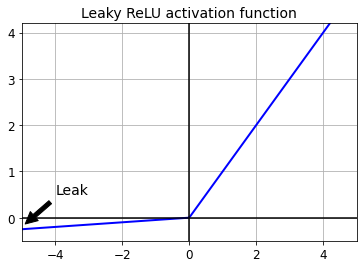

In [10]:
plt.plot(z, leaky_relu(z, 0.05), 'b-', linewidth=2)
plt.plot([-5, 5], [0, 0], 'k-')
plt.plot([0, 0], [-0.5, 4.2], 'k-')
plt.grid(True)
props = dict(facecolor='black', shrink=0.1)
plt.annotate('Leak', xytext=(-3.5, 0.5), xy=(-5, -0.2), arrowprops=props, fontsize=14, ha='center')
plt.title('Leaky ReLU activation function', fontsize=14)
plt.axis([-5, 5, -0.5, 4.2])
#save_fig('leaky_relu_plot')
plt.show()

In [11]:
[m for m in dir(keras.activations) if not m.startswith('_')]

['deserialize',
 'elu',
 'exponential',
 'gelu',
 'get',
 'hard_sigmoid',
 'linear',
 'relu',
 'selu',
 'serialize',
 'sigmoid',
 'softmax',
 'softplus',
 'softsign',
 'swish',
 'tanh']

In [12]:
[m for m in dir(keras.layers) if 'relu' in m.lower()]

['LeakyReLU', 'PReLU', 'ReLU', 'ThresholdedReLU']

In [13]:
n_valid = 5000
(X_train_full, y_train_full), (X_test, y_test) = keras.datasets.fashion_mnist.load_data()
X_train_full = X_train_full / 255.0
X_test = X_test / 255.0
X_valid, X_train = X_train_full[:n_valid], X_train_full[n_valid:]
y_valid, y_train = y_train_full[:n_valid], y_train_full[n_valid:]

In [14]:
tf.random.set_seed(42)
np.random.seed(42)
model = keras.models.Sequential([
    keras.layers.Flatten(input_shape=[28, 28]),
    keras.layers.Dense(300, kernel_initializer='he_normal'),
    keras.layers.ReLU(),
    keras.layers.Dense(100, kernel_initializer='he_normal'),
    keras.layers.ReLU(),
    keras.layers.Dense(10, activation='softmax')
])
model.summary()

Metal device set to: Apple M1
Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 784)               0         
                                                                 
 dense_2 (Dense)             (None, 300)               235500    
                                                                 
 re_lu (ReLU)                (None, 300)               0         
                                                                 
 dense_3 (Dense)             (None, 100)               30100     
                                                                 
 re_lu_1 (ReLU)              (None, 100)               0         
                                                                 
 dense_4 (Dense)             (None, 10)                1010      
                                                                 
Total params: 266,610
Trai

2022-02-10 20:19:47.043588: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:305] Could not identify NUMA node of platform GPU ID 0, defaulting to 0. Your kernel may not have been built with NUMA support.
2022-02-10 20:19:47.043709: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:271] Created TensorFlow device (/job:localhost/replica:0/task:0/device:GPU:0 with 0 MB memory) -> physical PluggableDevice (device: 0, name: METAL, pci bus id: <undefined>)


In [15]:
model.compile(loss='sparse_categorical_crossentropy', 
              optimizer=keras.optimizers.SGD(learning_rate=1e-3),
              metrics=['accuracy'])
history = model.fit(X_train, y_train, epochs=10,
                    validation_data=(X_valid, y_valid))

2022-02-10 20:19:47.259448: W tensorflow/core/platform/profile_utils/cpu_utils.cc:128] Failed to get CPU frequency: 0 Hz
2022-02-10 20:19:47.348269: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.


Epoch 1/10
1709/1719 [============================>.] - ETA: 0s - loss: 1.3338 - accuracy: 0.5965

2022-02-10 20:19:54.453261: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.


1719/1719 [==============================] - 8s 4ms/step - loss: 1.3314 - accuracy: 0.5971 - val_loss: 0.8955 - val_accuracy: 0.7198
Epoch 2/10
1719/1719 [==============================] - 7s 4ms/step - loss: 0.8053 - accuracy: 0.7485 - val_loss: 0.7146 - val_accuracy: 0.7748
Epoch 3/10
1719/1719 [==============================] - 7s 4ms/step - loss: 0.6866 - accuracy: 0.7798 - val_loss: 0.6417 - val_accuracy: 0.7982
Epoch 4/10
1719/1719 [==============================] - 7s 4ms/step - loss: 0.6245 - accuracy: 0.7971 - val_loss: 0.5884 - val_accuracy: 0.8148
Epoch 5/10
1719/1719 [==============================] - 7s 4ms/step - loss: 0.5847 - accuracy: 0.8073 - val_loss: 0.5549 - val_accuracy: 0.8226
Epoch 6/10
1719/1719 [==============================] - 7s 4ms/step - loss: 0.5561 - accuracy: 0.8150 - val_loss: 0.5312 - val_accuracy: 0.8264
Epoch 7/10
1719/1719 [==============================] - 7s 4ms/step - loss: 0.5341 - accuracy: 0.8204 - val_loss: 0.5113 - val_accuracy: 0.8350
Epo

In [16]:
tf.random.set_seed(42)
np.random.seed(42)
model = keras.models.Sequential([
    keras.layers.Flatten(input_shape=[28, 28]),
    keras.layers.Dense(300, kernel_initializer='he_normal', activation='relu'),
    keras.layers.Dense(100, kernel_initializer='he_normal', activation='relu'),
    keras.layers.Dense(10, activation='softmax')
])
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_1 (Flatten)         (None, 784)               0         
                                                                 
 dense_5 (Dense)             (None, 300)               235500    
                                                                 
 dense_6 (Dense)             (None, 100)               30100     
                                                                 
 dense_7 (Dense)             (None, 10)                1010      
                                                                 
Total params: 266,610
Trainable params: 266,610
Non-trainable params: 0
_________________________________________________________________


In [17]:
model.compile(loss='sparse_categorical_crossentropy', 
              optimizer=keras.optimizers.SGD(learning_rate=1e-3),
              metrics=['accuracy'])
history = model.fit(X_train, y_train, epochs=10,
                    validation_data=(X_valid, y_valid))

Epoch 1/10
  39/1719 [..............................] - ETA: 6s - loss: 2.3384 - accuracy: 0.1178

2022-02-10 20:20:59.770324: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.


1719/1719 [==============================] - ETA: 0s - loss: 1.3314 - accuracy: 0.5971

2022-02-10 20:21:06.819143: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.


1719/1719 [==============================] - 8s 4ms/step - loss: 1.3314 - accuracy: 0.5971 - val_loss: 0.8955 - val_accuracy: 0.7198
Epoch 2/10
1719/1719 [==============================] - 7s 4ms/step - loss: 0.8053 - accuracy: 0.7485 - val_loss: 0.7146 - val_accuracy: 0.7748
Epoch 3/10
1719/1719 [==============================] - 7s 4ms/step - loss: 0.6866 - accuracy: 0.7798 - val_loss: 0.6417 - val_accuracy: 0.7982
Epoch 4/10
1719/1719 [==============================] - 7s 4ms/step - loss: 0.6245 - accuracy: 0.7971 - val_loss: 0.5884 - val_accuracy: 0.8148
Epoch 5/10
1719/1719 [==============================] - 7s 4ms/step - loss: 0.5847 - accuracy: 0.8073 - val_loss: 0.5549 - val_accuracy: 0.8226
Epoch 6/10
1719/1719 [==============================] - 7s 4ms/step - loss: 0.5561 - accuracy: 0.8150 - val_loss: 0.5312 - val_accuracy: 0.8264
Epoch 7/10
1719/1719 [==============================] - 7s 4ms/step - loss: 0.5341 - accuracy: 0.8204 - val_loss: 0.5113 - val_accuracy: 0.8350
Epo

In [18]:
tf.random.set_seed(42)
np.random.seed(42)
model = keras.models.Sequential([
    keras.layers.Flatten(input_shape=[28, 28]),
    keras.layers.Dense(300, kernel_initializer='he_normal'),
    keras.layers.LeakyReLU(),
    keras.layers.Dense(100, kernel_initializer='he_normal'),
    keras.layers.LeakyReLU(),
    keras.layers.Dense(10, activation='softmax')
])
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_2 (Flatten)         (None, 784)               0         
                                                                 
 dense_8 (Dense)             (None, 300)               235500    
                                                                 
 leaky_re_lu (LeakyReLU)     (None, 300)               0         
                                                                 
 dense_9 (Dense)             (None, 100)               30100     
                                                                 
 leaky_re_lu_1 (LeakyReLU)   (None, 100)               0         
                                                                 
 dense_10 (Dense)            (None, 10)                1010      
                                                                 
Total params: 266,610
Trainable params: 266,610
Non-tr

In [19]:
model.compile(loss='sparse_categorical_crossentropy', 
              optimizer=keras.optimizers.SGD(learning_rate=1e-3),
              metrics=['accuracy'])
history = model.fit(X_train, y_train, epochs=10,
                    validation_data=(X_valid, y_valid))

Epoch 1/10
  14/1719 [..............................] - ETA: 7s - loss: 2.4468 - accuracy: 0.0804  

2022-02-10 20:22:12.821401: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.


1719/1719 [==============================] - ETA: 0s - loss: 1.2646 - accuracy: 0.6110

2022-02-10 20:22:19.868834: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.


1719/1719 [==============================] - 8s 4ms/step - loss: 1.2646 - accuracy: 0.6110 - val_loss: 0.8643 - val_accuracy: 0.7208
Epoch 2/10
1719/1719 [==============================] - 7s 4ms/step - loss: 0.7870 - accuracy: 0.7462 - val_loss: 0.7035 - val_accuracy: 0.7736
Epoch 3/10
1719/1719 [==============================] - 7s 4ms/step - loss: 0.6795 - accuracy: 0.7782 - val_loss: 0.6377 - val_accuracy: 0.7922
Epoch 4/10
1719/1719 [==============================] - 7s 4ms/step - loss: 0.6210 - accuracy: 0.7954 - val_loss: 0.5861 - val_accuracy: 0.8104
Epoch 5/10
1719/1719 [==============================] - 7s 4ms/step - loss: 0.5824 - accuracy: 0.8068 - val_loss: 0.5533 - val_accuracy: 0.8212
Epoch 6/10
1719/1719 [==============================] - 7s 4ms/step - loss: 0.5544 - accuracy: 0.8145 - val_loss: 0.5303 - val_accuracy: 0.8276
Epoch 7/10
1719/1719 [==============================] - 7s 4ms/step - loss: 0.5333 - accuracy: 0.8206 - val_loss: 0.5114 - val_accuracy: 0.8336
Epo

In [20]:
tf.random.set_seed(42)
np.random.seed(42)
model = keras.models.Sequential([
    keras.layers.Flatten(input_shape=[28, 28]),
    keras.layers.Dense(300, kernel_initializer='he_normal'),
    keras.layers.PReLU(),
    keras.layers.Dense(100, kernel_initializer='he_normal'),
    keras.layers.PReLU(),
    keras.layers.Dense(10, activation='softmax')
])
model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_3 (Flatten)         (None, 784)               0         
                                                                 
 dense_11 (Dense)            (None, 300)               235500    
                                                                 
 p_re_lu (PReLU)             (None, 300)               300       
                                                                 
 dense_12 (Dense)            (None, 100)               30100     
                                                                 
 p_re_lu_1 (PReLU)           (None, 100)               100       
                                                                 
 dense_13 (Dense)            (None, 10)                1010      
                                                                 
Total params: 267,010
Trainable params: 267,010
Non-tr

In [21]:
model.compile(loss='sparse_categorical_crossentropy', 
              optimizer=keras.optimizers.SGD(learning_rate=1e-3),
              metrics=['accuracy'])
history = model.fit(X_train, y_train, epochs=10,
                    validation_data=(X_valid, y_valid))

Epoch 1/10
  11/1719 [..............................] - ETA: 8s - loss: 2.4247 - accuracy: 0.0455  

2022-02-10 20:23:25.115268: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.


1719/1719 [==============================] - ETA: 0s - loss: 1.3308 - accuracy: 0.5974

2022-02-10 20:23:32.898322: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.


1719/1719 [==============================] - 8s 5ms/step - loss: 1.3308 - accuracy: 0.5974 - val_loss: 0.8952 - val_accuracy: 0.7202
Epoch 2/10
1719/1719 [==============================] - 8s 5ms/step - loss: 0.8051 - accuracy: 0.7485 - val_loss: 0.7144 - val_accuracy: 0.7754
Epoch 3/10
1719/1719 [==============================] - 8s 5ms/step - loss: 0.6864 - accuracy: 0.7799 - val_loss: 0.6416 - val_accuracy: 0.7982
Epoch 4/10
1719/1719 [==============================] - 8s 5ms/step - loss: 0.6243 - accuracy: 0.7973 - val_loss: 0.5882 - val_accuracy: 0.8150
Epoch 5/10
1719/1719 [==============================] - 8s 5ms/step - loss: 0.5846 - accuracy: 0.8073 - val_loss: 0.5548 - val_accuracy: 0.8228
Epoch 6/10
1719/1719 [==============================] - 8s 5ms/step - loss: 0.5560 - accuracy: 0.8150 - val_loss: 0.5312 - val_accuracy: 0.8262
Epoch 7/10
1719/1719 [==============================] - 8s 5ms/step - loss: 0.5340 - accuracy: 0.8205 - val_loss: 0.5112 - val_accuracy: 0.8352
Epo

##### ELU

In [22]:
def elu(z, alpha=1):
    return np.where(z < 0, alpha * (np.exp(z) - 1), z)

Saving figure elu_plot


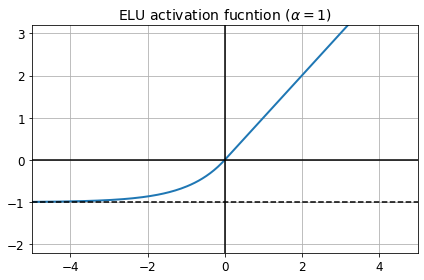

In [23]:
plt.plot(z, elu(z), linewidth=2)
plt.plot([-5, 5], [0, 0], 'k-')
plt.plot([-5, 5], [-1, -1], 'k--')
plt.plot([0, 0], [-2.2, 3.2], 'k-')
plt.grid(True)
plt.title(r'ELU activation fucntion ($\alpha=1$)', fontsize=14)
plt.axis([-5, 5, -2.2, 3.2])
save_fig('elu_plot')
plt.show()

In [24]:
keras.layers.Dense(10, activation='elu')

##### SELU

In [25]:
from scipy.special import erfc

# alpha and scale to self normalize with mean 0 and standard deviation 1
# (see equation 14 in the paper):
alpha_0_1 = -np.sqrt(2 / np.pi) / (erfc(1/np.sqrt(2)) * np.exp(1/2) - 1)
scale_0_1 = (1 - erfc(1 / np.sqrt(2)) * np.sqrt(np.e)) * np.sqrt(2 * np.pi) * (2 * erfc(np.sqrt(2))*np.e**2 + np.pi*erfc(1/np.sqrt(2))**2*np.e - 2*(2+np.pi)*erfc(1/np.sqrt(2))*np.sqrt(np.e)+np.pi+2)**(-1/2)

In [26]:
def selu(z, scale=scale_0_1, alpha=alpha_0_1):
    return scale * elu(z, alpha)

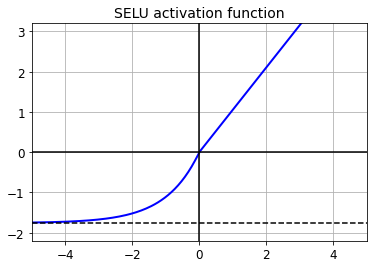

In [27]:
plt.plot(z, selu(z), 'b-', linewidth=2)
plt.plot([-5, 5], [0, 0], 'k-')
plt.plot([-5, 5], [-1.758, -1.758], 'k--')
plt.plot([0, 0], [-2.2, 3.2], 'k-')
plt.grid(True)
plt.title('SELU activation function', fontsize=14)
plt.axis([-5, 5, -2.2, 3.2])
#save_fig('selu_plot')
plt.show()

In [28]:
np.random.seed(42)
Z = np.random.normal(size=(500, 100))
for layer in range(1000):
    W = np.random.normal(size=(100, 100), scale=np.sqrt(1/100)) # LeCun initialization
    Z = selu(np.dot(Z, W))
    means = np.mean(Z, axis=0).mean()
    stds = np.std(Z, axis=0).mean()
    if layer % 100 == 0:
        print('Layer {}: mean: {:.2f}, std deviation: {:.2f}'.format(layer, means, stds))

Layer 0: mean: -0.00, std deviation: 1.00
Layer 100: mean: 0.02, std deviation: 0.96
Layer 200: mean: 0.01, std deviation: 0.90
Layer 300: mean: -0.02, std deviation: 0.92
Layer 400: mean: 0.05, std deviation: 0.89
Layer 500: mean: 0.01, std deviation: 0.93
Layer 600: mean: 0.02, std deviation: 0.92
Layer 700: mean: -0.02, std deviation: 0.90
Layer 800: mean: 0.05, std deviation: 0.83
Layer 900: mean: 0.02, std deviation: 1.00


In [29]:
keras.layers.Dense(10, activation='selu', kernel_initializer='lecun_normal')

In [30]:
np.random.seed(42)
tf.random.set_seed(42)

In [31]:
model = keras.models.Sequential()
model.add(keras.layers.Flatten(input_shape=[28, 28]))
model.add(keras.layers.Dense(300, activation='selu', kernel_initializer='lecun_normal'))
for layer in range(99):
    model.add(keras.layers.Dense(100, activation='selu', kernel_initializer='lecun_normal'))
model.add(keras.layers.Dense(10, activation='softmax'))

In [32]:
model.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_4 (Flatten)         (None, 784)               0         
                                                                 
 dense_16 (Dense)            (None, 300)               235500    
                                                                 
 dense_17 (Dense)            (None, 100)               30100     
                                                                 
 dense_18 (Dense)            (None, 100)               10100     
                                                                 
 dense_19 (Dense)            (None, 100)               10100     
                                                                 
 dense_20 (Dense)            (None, 100)               10100     
                                                                 
 dense_21 (Dense)            (None, 100)              

In [33]:
model.compile(loss='sparse_categorical_crossentropy',
              optimizer=keras.optimizers.SGD(learning_rate=1e-3),
              metrics=['accuracy'])

In [34]:
pixel_means = X_train.mean(axis=0, keepdims=True)
pixel_stds = X_train.std(axis=0, keepdims=True)
X_train_scaled = (X_train - pixel_means) / pixel_stds
X_valid_scaled = (X_valid - pixel_means) / pixel_stds
X_test_scaled = (X_test - pixel_means) / pixel_stds

In [35]:
history = model.fit(X_train_scaled, y_train, epochs=5, 
                    validation_data=(X_valid_scaled, y_valid))

Epoch 1/5


2022-02-10 20:24:50.921467: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.


1719/1719 [==============================] - ETA: 0s - loss: 1.6004 - accuracy: 0.3878

2022-02-10 20:29:03.635596: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.


1719/1719 [==============================] - 263s 152ms/step - loss: 1.6004 - accuracy: 0.3878 - val_loss: 1.2384 - val_accuracy: 0.5468
Epoch 2/5
1719/1719 [==============================] - 259s 151ms/step - loss: 1.3694 - accuracy: 0.4958 - val_loss: 1.4264 - val_accuracy: 0.4528
Epoch 3/5
1719/1719 [==============================] - 260s 151ms/step - loss: 1.0676 - accuracy: 0.5835 - val_loss: 1.1408 - val_accuracy: 0.5758
Epoch 4/5
1719/1719 [==============================] - 260s 151ms/step - loss: 0.7915 - accuracy: 0.6872 - val_loss: 0.7570 - val_accuracy: 0.6982
Epoch 5/5
1719/1719 [==============================] - 259s 151ms/step - loss: 0.7075 - accuracy: 0.7271 - val_loss: 0.7740 - val_accuracy: 0.6962
